/tmp/ipykernel_206/2712183153.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data_not_transformed = voice_data.fillna(method='ffill')
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Nulls Count: 0
NaN Count: 0
Outliers based on z-score: 43        4.255762e+09
51        3.886478e+09
152       4.041404e+09
159       4.693068e+09
182       4.501757e+09
              ...     
203493    7.836006e+09
205007    6.993776e+09
206185    4.051272e+09
206264    3.875147e+09
206671    7.254125e+09
Name: total_volume, Length: 1760, dtype: float64
RMSE
4.668762414361302
MAE
4.03020597491953
MSE
21.797342481752768
Final RMSE: 4.668762414361302
Final MAE: 4.03020597491953
Final MSE: 21.797342481752768


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE
4.818665170119751
MAE
4.024637593574883
MSE
23.219534021725213
Final RMSE: 4.668762414361302
Final MAE: 4.024637593574883
Final MSE: 21.797342481752768


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE
4.823060934133735
MAE
4.0192447861086595
MSE
23.261916774366977
Final RMSE: 4.668762414361302
Final MAE: 4.0192447861086595
Final MSE: 21.797342481752768


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE
4.832539964423142
MAE
4.038825918443387
MSE
23.353442507746824
Final RMSE: 4.668762414361302
Final MAE: 4.0192447861086595
Final MSE: 21.797342481752768


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE
4.7954936447869505
MAE
4.008720623119107
MSE
22.99675929719203
Final RMSE: 4.668762414361302
Final MAE: 4.008720623119107
Final MSE: 21.797342481752768


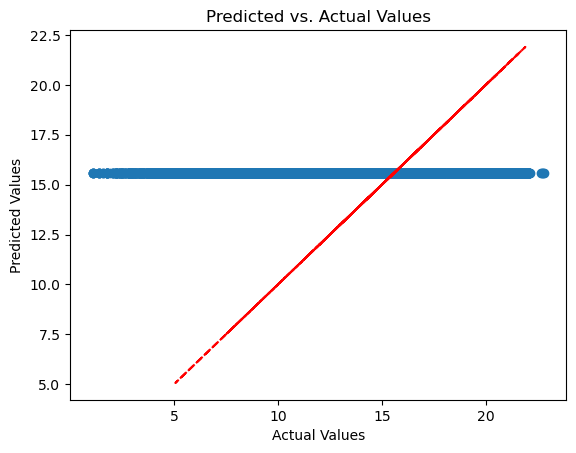

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Read the data from a CSV file
data_load = pd.read_csv('data_copy.csv')
data = data_load[data_load['teleservice_cat'] == 'VOICE']
voice_data = pd.to_numeric(data['total_volume'], errors='coerce')

filled_data_not_transformed = voice_data.fillna(method='ffill')

print(f"Nulls Count: {filled_data_not_transformed.isnull().sum(axis=0)}")
print(f"NaN Count: {filled_data_not_transformed.isna().sum()}")

# Calculate z-scores
z_scores = (filled_data_not_transformed - filled_data_not_transformed.mean()) / filled_data_not_transformed.std()

# Identify outliers based on z-score threshold (e.g., +/- 3)
outliers = filled_data_not_transformed[abs(z_scores) > 3]

print(f"Outliers based on z-score: {outliers}")


filled_data = np.log1p(filled_data_not_transformed+ 1)

# Define parameter grid for alpha
param_grid = {'alpha': np.linspace(0.05, 0.95, 19)}  # Include a wider range of alpha values

# Define scoring metric
def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)


def mae(y_true, y_pred):  # Define mae function here
  return mean_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred)) 

best_model = None
best_score = np.inf
# Define time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust number of splits as needed

# Grid search loop
for params in param_grid.values():
    # Perform cross-validation
                cv_scores = []
                cv_scores2 = []
                cv_scores3 = []
                for train_index, test_index in tscv.split(filled_data):
                    train, validation = filled_data.iloc[train_index], filled_data.iloc[test_index]
                    model = ExponentialSmoothing(filled_data, trend=None, seasonal=None, seasonal_periods=None)
                    alpha_value = params  # Extract the current alpha value from params
                    model_fit = model.fit(smoothing_level=0.05)
                    predictions = model_fit.forecast(steps=len(validation))
                    rmse = np.sqrt(mean_squared_error(validation, predictions))
                    mae = mean_absolute_error(validation, predictions)
                    mse = mean_squared_error(validation, predictions)
                    absolute_errors = np.abs(filled_data - predictions)
                    absolute_errors_numeric = pd.to_numeric(absolute_errors, errors='coerce')
                   

                    print("RMSE")
                    print(rmse)
                    print("MAE")
                    print(mae)
                    print("MSE")
                    print(mse)
                    #print(mape)

                    cv_scores.append(rmse)
                    cv_scores2.append(mae)
                    cv_scores3.append(mse)

                    print(f"Final RMSE: {min(cv_scores)}")
                    print(f"Final MAE: {min(cv_scores2)}")
                    print(f"Final MSE: {min(cv_scores3)}")
                    
                mean_cv_score = np.mean(cv_scores)
                #if mean_cv_score < best_score:
                best_score, best_model = mean_cv_score, model




plt.scatter(validation, predictions)
plt.plot(validation[-20:], validation[-20:], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()
                #best_order = order
        #except Exception as e:
            #print(f"Error fitting model: {e}")
            #continue  # Handle potential model fitting errors

#print(f"Final RMSE: {min(cv_scores)}")
#print(f"Final MAE: {min(cv_scores2)}")
#print(f"Final MSE: {min(cv_scores3)}")




    ##########################################################################################
    
      # Pass the single alpha value
    #predictions = model_fit.forecast(len(filled_data))
    #score = mse(filled_data.iloc[-len(predictions):], predictions)
    #if score < best_score:
        #best_model = model_fit
        #best_score = score
    ##########################################################################################    

# Use the best model for further analysis or forecasting
#print("Best Model:", best_model)
#print("Best Alpha:", best_model.params['alpha'])
#print("Best Score:", best_score)

# Calculate and print all metrics for the best model
#best_predictions = best_model.forecast(len(filled_data))
#best_mse = mse(filled_data.iloc[-len(best_predictions):], best_predictions)
#best_mae = mae(filled_data.iloc[-len(best_predictions):], best_predictions)
#best_rmse = rmse(filled_data.iloc[-len(best_predictions):], best_predictions)

#print("Best Model:", best_model)
#print("Best Alpha:", best_model.params['alpha'])  # Uncomment if needed
#print("Best MSE:", best_mse)
#print("Best MAE:", best_mae)
#print("Best RMSE:", best_rmse)
